[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1s4QvKZAjWxq5bS_RlXmWtumctmDQy0Xb#scrollTo=VcC5MjRQ7S6P)

## YOLOv8 Object Detection Notebook

This project demonstrates the use of the YOLOv8 (You Only Look Once version 8) deep learning model for real-time object detection, specifically focusing on identifying birds within an image. The model is pre-trained on the COCO dataset, which supports detection of 80 common object categories.

The image used in this task, birds.jpg, is processed to:

Detect and label all objects with a confidence level greater than 50%.
Filter the results to display only objects classified as "bird" with a confidence level greater than 50%.
Visually present three output versions of the image:
The original image (for reference)
An image showing all high-confidence detections
An image showing only high-confidence bird detections

---
### Mount to Google Drive
Mount to your Google Drive to access the images and model files

In [ ]:
# --------------------------------------
# Mount Google Drive to access image
# --------------------------------------

# This cell mounts your Google Drive to the Colab environment, allowing the notebook to access files stored there

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


---
### Set Image Path

In [ ]:
# --------------------------------------
# Define the path to the input image
# --------------------------------------

# This variable stores the file path to the image located in your Google Drive that will be used for object detection

dataset_location = "/content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/birds.jpg"

---
### Install Required Packages

In [ ]:
# --------------------------------------
# Install required packages (YOLOv8 and OpenCV)
# --------------------------------------

# This command installs the necessary Python libraries:
# - ultralytics: Contains the YOLOv8 model implementation
# - opencv-python: OpenCV library for image processing tasks
# - matplotlib: For displaying images and plots
# The -q flag is used for a quiet installation

!pip install -q ultralytics opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.7 MB/s eta 0:00:00


---
### Import Libraries

In [ ]:
# --------------------------------------
# Import required libraries
# --------------------------------------

# These lines import the necessary Python libraries into the current environment for use in the notebook
# - os: Provides a way to interact with the operating system, like creating directories
# - cv2: The OpenCV library, used here for reading, writing, and manipulating images
# - numpy: A fundamental package for scientific computing with Python, often used in image processing for array operations
# - matplotlib.pyplot: Used for plotting and displaying images
# - google.colab.patches.cv2_imshow: A function provided by Colab to display OpenCV images correctly within the notebook

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


---
### Load Image & Create Copies

In [ ]:
# ----------------------------------------
# Load original image for display and copying
# ----------------------------------------

# Reads the image from the specified path using OpenCV
# Creates two copies of the original image
# - image_all: Will be used to draw bounding boxes for all detected objects
# - image_bird: Will be used to draw bounding boxes only for detected birds
# This is done to display different sets of results without modifying the original image

original_image = cv2.imread(dataset_location)
image_with_all_detections = original_image.copy()      # For labeling all classes with conf > 0.5
image_with_bird_detections = original_image.copy()     # For labeling birds only

---
### Load YOLOv8 Model

In [ ]:
# --------------------------------------
# Load the YOLOv8 pre-trained model (on COCO dataset)
# --------------------------------------

# Initializes a YOLO object with the 'yolov8s.pt' pre-trained weights
# 'yolov8s.pt' is a small version of the YOLOv8 model offering a balance of speed and accuracy
# You could use 'yolov8n.pt' for a faster, less accurate model or 'yolov8m.pt' for a slower, more accurate model

model = YOLO('yolov8s.pt')  # You can use 'yolov8m.pt' for better accuracy

100%|██████████| 21.5M/21.5M [00:00<00:00, 131MB/s]


---
### Perform Inference

In [ ]:
# --------------------------------------
# Perform object detection on the image
# --------------------------------------

# Runs the loaded YOLOv8 model on the input image specified by dataset_location
# The results object contains the detection information, including bounding boxes, confidence scores, and class predictions

results = model(dataset_location)


image 1/1 /content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/birds.jpg: 640x448 5 persons, 1 boat, 1 bench, 8 birds, 1 handbag, 952.3ms
Speed: 24.1ms preprocess, 952.3ms inference, 35.7ms postprocess per image at shape (1, 3, 640, 448)


In [ ]:
# --------------------------------------
# Load the original image using OpenCV
# --------------------------------------

# This line re-loads the original image. While it was loaded before, this ensures a fresh copy if needed later
# (though in this specific notebook, the copies 'image_all' and 'image_bird' are primarily used)

image = cv2.imread(dataset_location)

### Displaying Detected Object Bounding Boxes with Class Labels and Confidence Scores

In [ ]:
# ----------------------------------------
# Display Detected Bounding Boxes with Class Names
# ----------------------------------------

# This block of code loops through the results from the YOLOv8 object detection model.
# It extracts and prints the following information for each detected object:
# - The coordinates of the bounding box (top-left and bottom-right corners)
# - The confidence score (i.e., how sure the model is about the detection)
# - The class name (e.g., bird, person, car) based on the detected object

for result in results:  # Iterate over each detection result (YOLOv8 may return multiple batches)
  for box in result.boxes:  # For each bounding box detected in the result
    class_index = int(box.cls)  # Get the class index (e.g., 0 for 'person', 14 for 'bird', etc.)
    class_name = model.names[class_index]  # Convert class index to readable class name using YOLOv8 class labels
    # Print the detection information:
    # - box.xyxy gives the coordinates [x1, y1, x2, y2]
    # - box.conf is the confidence score of the prediction
    # - class_name is the human-readable label for the detected object
    print(f"Box: {box.xyxy.tolist()[0]}, Confidence: {box.conf.tolist()[0]:.2f}, Class: {class_name}")

Box: [267.34222412109375, 498.4379577636719, 486.4145202636719, 957.926513671875], Confidence: 0.90, Class: person
Box: [5.563076972961426, 506.8202209472656, 256.1204528808594, 958.1617431640625], Confidence: 0.87, Class: person
Box: [69.66498565673828, 64.23556518554688, 207.4429931640625, 132.60546875], Confidence: 0.83, Class: bird
Box: [557.1196899414062, 482.3133850097656, 640.0, 959.0], Confidence: 0.79, Class: person
Box: [364.59759521484375, 225.62843322753906, 445.981689453125, 329.8565673828125], Confidence: 0.77, Class: bird
Box: [70.4513931274414, 344.7794494628906, 165.12313842773438, 437.4855651855469], Confidence: 0.74, Class: bird
Box: [448.4845886230469, 238.278564453125, 567.1393432617188, 317.677734375], Confidence: 0.69, Class: bird
Box: [210.93804931640625, 257.1170959472656, 295.8216247558594, 287.8056335449219], Confidence: 0.64, Class: bird
Box: [203.5365753173828, 505.5787658691406, 319.3375244140625, 537.9025268554688], Confidence: 0.58, Class: boat
Box: [67.

###Class-Dependent Blox Colors

In [ ]:
# ----------------------------------------
# Generate Unique Colors for Each Class
# ----------------------------------------

# Get total number of classes the YOLOv8 model can detect
num_classes = len(model.names)

# Create a color map using matplotlib's 'tab20' (supports up to 20 visually distinct colors)
color_map = cm.get_cmap('tab20', num_classes)

# Convert the colormap (RGBA) into BGR format for OpenCV and map each class index to a color
class_colors = {
    idx: (int(c[2]*255), int(c[1]*255), int(c[0]*255))  # OpenCV uses BGR, not RGB
    for idx, c in enumerate([color_map(i) for i in range(num_classes)])
}

/tmp/ipython-input-10-2938231284.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', num_classes)


### Draw Bounding Boxes for All Objects (Confidence > 0.5)

In [ ]:
# ----------------------------------------
# Draw bounding boxes for all objects (confidence > 0.5)
# ----------------------------------------

# This loop processes all detections from the YOLOv8 model output.
# It draws red bounding boxes around every detected object (regardless of class)
# if its confidence score exceeds 0.5.

# The label shows the object's class and confidence.
for result in results:
    # Loop through each detected bounding box
    for box in result.boxes:
        confidence = float(box.conf)  # Convert confidence score to float

        # Proceed only if confidence is above threshold
        if confidence > 0.5:
            # Extract coordinates for bounding box (top-left and bottom-right corners)
            x1, y1, x2, y2 = [int(i) for i in box.xyxy[0]]

            # Get predicted class index and name
            class_index = int(box.cls)
            class_name = model.names[class_index]

            # Format label to show class name and confidence
            label = f"{class_name}: {confidence:.2f}"

            # Use the unique color assigned to this class
            color = class_colors[class_index]

            # Draw bounding box around detected object
            cv2.rectangle(image_with_all_detections, (x1, y1), (x2, y2), color, 2)

            # Set font and label settings
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.6
            thickness = 1
            text_color = (255, 255, 255)  # White text

            # Calculate label size and positioning
            (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, thickness)
            text_x = x1
            text_y = y1 - 10 if y1 - 10 > text_height else y1 + text_height + 10

            # Draw background rectangle for label (same color as bounding box)
            cv2.rectangle(image_with_all_detections,
                          (text_x, text_y - text_height - baseline),
                          (text_x + text_width, text_y + baseline),
                          color, -1)

            # Place label text on top of the filled rectangle
            cv2.putText(image_with_all_detections, label, (text_x, text_y), font, font_scale, text_color, thickness)


### Draw Bounding Boxes for Birds Only (Confidence > 0.5)

In [ ]:
# -------------------------------
# Loop to draw only bird detections (confidence > 50%)
# -------------------------------\

# This loop filters the YOLOv8 results to display only "bird" detections
# with a confidence score greater than 50%.
# The bounding box is drawn in blue and the label includes class name + confidence.

# The label shows the object's class and confidence.
for result in results:
    # Loop through each detected bounding box
    for box in result.boxes:
        confidence = float(box.conf)  # Convert confidence score to float
        class_index = int(box.cls)
        class_name = model.names[class_index]

        # Only proceed if detected class is "bird" and confidence > 0.5
        if class_name in ['bird'] and confidence > 0.5:
            # Get bounding box coordinates
            x1, y1, x2, y2 = [int(i) for i in box.xyxy[0]]

            # Label format
            label = f"{class_name}: {confidence:.2f}"

            # Fixed blue color for filtered detections
            color = (255, 0, 0)

            # Draw bounding box
            cv2.rectangle(image_with_bird_detections, (x1, y1), (x2, y2), color, 2)

            # Font and label settings
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.6
            thickness = 1
            text_color = (255, 255, 255)
            (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, thickness)

            # Adjust label position to avoid going off-image
            text_x = x1
            text_y = y1 - 10 if y1 - 10 > text_height else y1 + text_height + 10

            # Draw label background
            cv2.rectangle(image_with_bird_detections,
                          (text_x, text_y - text_height - baseline),
                          (text_x + text_width, text_y + baseline),
                          color, -1)

            # Overlay the label text
            cv2.putText(image_with_bird_detections, label, (text_x, text_y), font, font_scale, text_color, thickness)

---
### Display All Images with Matplotlib

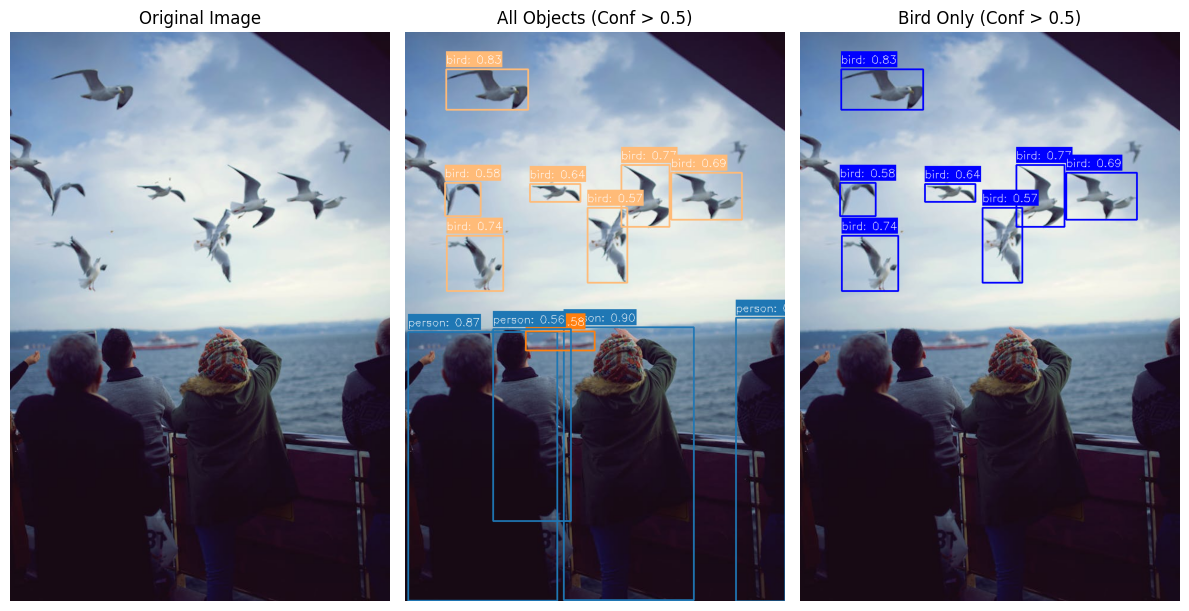

In [ ]:
# ----------------------------------------
# Display images using matplotlib (side-by-side)
# ----------------------------------------

# This cell prepares and displays the three images (original, all objects, birds only) using Matplotlib
# - Converts images from BGR (OpenCV default) to RGB (Matplotlib default) format
# - Creates a figure and a grid of subplots (1 row, 3 columns)
# - Displays each image in its respective subplot with a title and turns off the axis labels
# - Adjusts the layout to prevent titles/labels from overlapping
# - Shows the plot

original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
image_all_rgb = cv2.cvtColor(image_with_all_detections, cv2.COLOR_BGR2RGB)
image_bird_rgb = cv2.cvtColor(image_with_bird_detections, cv2.COLOR_BGR2RGB)

# Create a figure to hold the plots
plt.figure(figsize=(12, 6))

# Original Image subplot
plt.subplot(1, 3, 1) # (rows, columns, panel number)
plt.imshow(original_rgb)
plt.title("Original Image")
plt.axis("off") # Hide axes ticks and labels

# All Detections subplot
plt.subplot(1, 3, 2)
plt.imshow(image_all_rgb)
plt.title("All Objects (Conf > 0.5)")
plt.axis("off")

# Bird Only Detections subplot
plt.subplot(1, 3, 3)
plt.imshow(image_bird_rgb)
plt.title("Bird Only (Conf > 0.5)")
plt.axis("off")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Export Processed Image

In [ ]:
# ----------------------------------------
# Export Processed Image
# ----------------------------------------

# This cell saves the processed images (with bounding boxes) to a specified folder in your Google Drive

# Define the output folder path in Google Drive
result_folder = "/content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/Processed_bird_images"

# Create the folder if it does not already exist
# os.makedirs creates directories recursively and does not raise an error if the directory already exists (exist_ok=True)
os.makedirs(result_folder, exist_ok=True)

# Convert RGB images back to BGR format
# OpenCV saves images in BGR format, but matplotlib uses RGB for display
# We need to convert the images back to BGR before saving them using cv2.imwrite
original_bgr = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2BGR)
image_all_bgr = cv2.cvtColor(image_all_rgb, cv2.COLOR_RGB2BGR)
image_bird_bgr = cv2.cvtColor(image_bird_rgb, cv2.COLOR_RGB2BGR)

# Define output file names and paths by joining the folder path and filenames
original_path = os.path.join(result_folder, "original.jpg")
all_objects_path = os.path.join(result_folder, "all_objects.jpg")
birds_only_path = os.path.join(result_folder, "birds_only.jpg")

# Save the images to the specified location in Google Drive
# cv2.imwrite saves the image to the given file path
cv2.imwrite(original_path, original_bgr)
cv2.imwrite(all_objects_path, image_all_bgr)
cv2.imwrite(birds_only_path, image_bird_bgr)

# Confirm successful export by printing the paths of the saved files
print("Exported Images:")
print(f"- Original: {original_path}")
print(f"- All Objects: {all_objects_path}")
print(f"- Birds Only: {birds_only_path}")

Exported Images:
- Original: /content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/Processed_bird_images/original.jpg
- All Objects: /content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/Processed_bird_images/all_objects.jpg
- Birds Only: /content/gdrive/MyDrive/Perform Object Detection (YOLOv8)/Processed_bird_images/birds_only.jpg


##Purpose and Learning Outcomes

###Purpose of the Project
The purpose of this project is to apply pre-trained object detection models, specifically YOLOv8, to analyze visual data and detect relevant objects within an image. By leveraging computer vision, this project enables automatic identification of various objects such as birds, airplanes, and other entities from photographic input. The key objective is to demonstrate the practical application of AI vision models in real-world use cases such as wildlife monitoring, drone surveillance, or automated labeling systems.

###Learning Outcomes
Upon completing this project, the following learning outcomes were achieved:

Familiarization with YOLOv8 Architecture
Gained hands-on experience using the YOLOv8 (You Only Look Once) object detection model, including loading pretrained weights and interpreting detection results.
Object Detection & Class Filtering
Learned to filter specific object classes (e.g., bird) based on confidence thresholds, and visualize results through bounding boxes and labels.
Image Annotation and Exportation
Developed skills in annotating images using OpenCV, converting between color spaces (BGR ↔ RGB), and exporting processed images for downstream tasks or reporting.
Effective Visualization Techniques
Practiced using matplotlib and OpenCV for clear visualization of object detection outputs in different formats: all objects, specific classes, and original input for comparison.
Python Scripting & Colab Usage
Improved Python coding proficiency within the Google Colab environment, including integrating packages like ultralytics, opencv-python, and matplotlib.

##Recommendations / Enhancements

| **Recommendation**                                    | **Description**                                                                              | **Purpose**                                                        |
| ----------------------------------------------------- | -------------------------------------------------------------------------------------------- | ------------------------------------------------------------------ |
| **1. Custom-Trained YOLOv8 Model**                    | Train or fine-tune YOLOv8 on a domain-specific dataset (e.g., bird species or medical tools) | Improve detection accuracy and relevance to the use case           |
| **2. Batch Image Processing**                         | Extend the script to support bulk processing of images in a folder                           | Automate annotation and streamline large-scale analysis            |
| **3. Adjustable Confidence Threshold**                | Add an interface or parameter to modify the detection threshold easily                       | Fine-tune model sensitivity and reduce false positives             |
| **4. Class-Dependent Color Coding** ✅ *(Implemented)* | Assign unique colors for each detected class using `matplotlib`’s colormap                   | Enhance visual distinction between object types                    |
| **5. Export Summary to CSV**                          | Output detection metadata (class, confidence, bounding box) into a CSV                       | Enable structured reporting or integration with analysis pipelines |
| **6. ZIP Export of All Outputs**                      | Bundle original, all detections, bird-only images, and reports into a ZIP file               | Improve usability and simplify downloads for sharing or archiving  |
| **7. Real-Time Webcam Detection** *(Optional)*        | Integrate YOLOv8 with a live video feed for real-time object detection                       | Extend the application to surveillance, robotics, or AR            |
